# Tesina Intelligent and Secure Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sea

In [2]:
# Load dataset
data = 'WirelessWiredData.csv'
df = pd.read_csv(data)

## Ispezione del dataset

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latency         1202 non-null   float64
 1   retransmission  1202 non-null   int64  
 2   bandwidth       1202 non-null   int64  
 3   label           1202 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 37.7+ KB
None


In [4]:
# Preview the dataset
print(df.head()) # first 5 elements

    latency  retransmission  bandwidth  label
0  0.000019               0   12526266  wired
1  0.000026               0   12524238  wired
2  0.000017               0   12524730  wired
3  0.000017               0   12524730  wired
4  0.000020               0   12520524  wired


wired       601
wireless    601
Name: label, dtype: int64


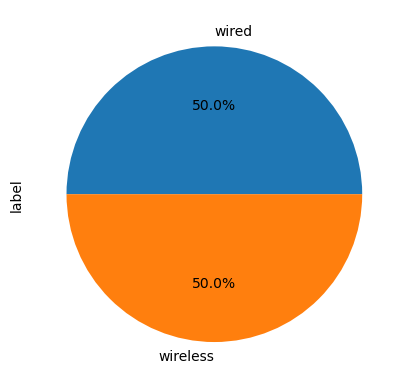

In [5]:
# Class distribution
print(df["label"].value_counts())
plt.figure()
figure = (df['label'].value_counts()*100.0 /len(df))\
		.plot.pie(autopct='%.1f%%', labels = ['wired', 'wireless'])
plt.show()

Il dataset è ovviamente bilanciato!

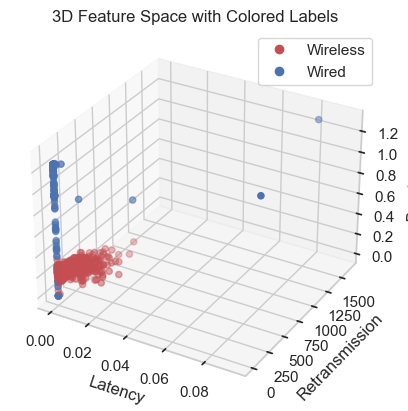

In [6]:
# Create a scatter plot with colored labels
sea.set(style="whitegrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define color map for labels
label_colors = {'wireless': 'r', 'wired': 'b'}
label_color_values = df['label'].map(label_colors)

# Scatter plot
scatter = ax.scatter(df['latency'], df['retransmission'], df['bandwidth'], c=label_color_values, marker='o')

# Set labels and title
ax.set_xlabel('Latency')
ax.set_ylabel('Retransmission')
ax.set_zlabel('Bandwidth')
ax.set_title('3D Feature Space with Colored Labels')

# Create legend
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label='Wireless', markerfacecolor='r', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='Wired', markerfacecolor='b', markersize=8)]
ax.legend(handles=legend_labels)

# Show the plot
plt.show()

In [7]:
# Class numerical conversion
df["label"]=[0 if i == "wired" else 1 for i in df["label"]]

In [8]:
# View summary statistics in numerical variables
print(round(df.describe(),2))

       latency  retransmission    bandwidth   label
count  1202.00         1202.00      1202.00  1202.0
mean      0.00           66.78   6932225.38     0.5
std       0.00          113.11   5046342.01     0.5
min       0.00            0.00         0.00     0.0
25%       0.00            0.00   2201455.50     0.0
50%       0.00            0.00   2857770.00     0.5
75%       0.00          116.50  12524722.00     1.0
max       0.09         1645.00  13002582.00     1.0


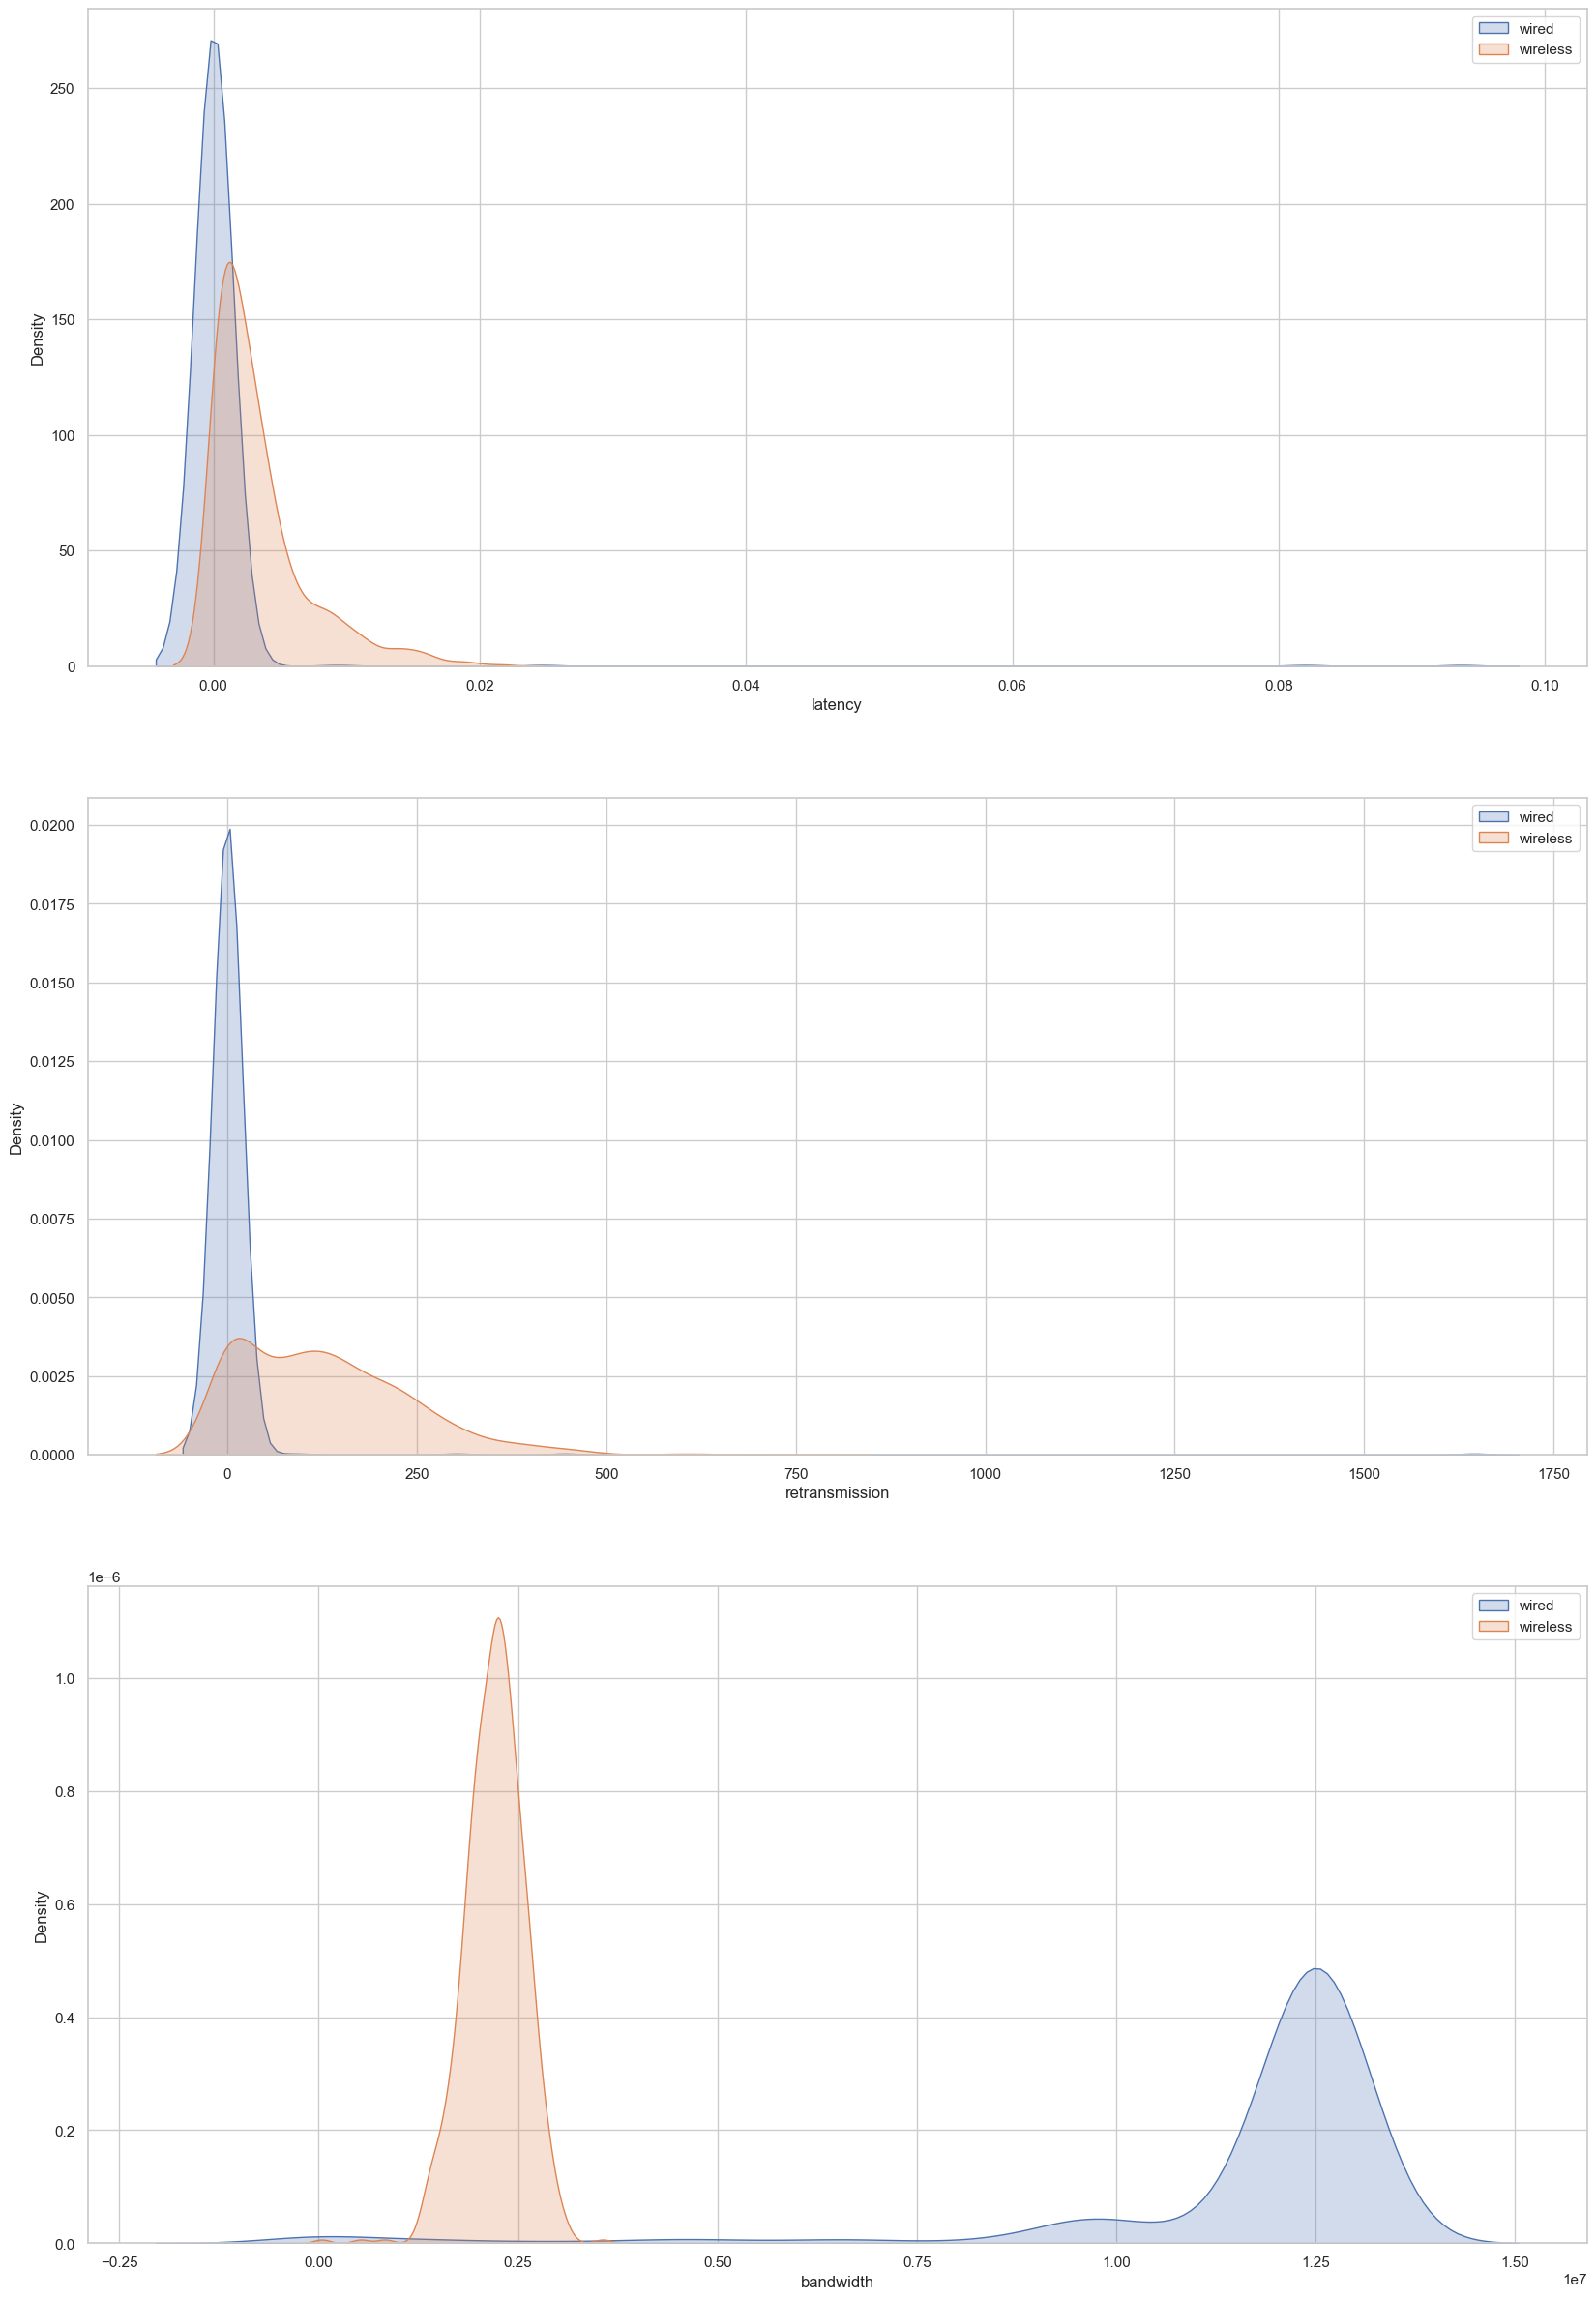

In [9]:
features = list(df.columns)
features.remove('label')
class_ = ['wired', 'wireless']
j=1
plt.figure(figsize=(20,30))
for f in features:
    plt.subplot(3, 1, j)
    for i in range(2):
        sea.kdeplot(data=df[df["label"] == i][f], label = class_[i], fill = True)
        plt.legend()
    j += 1

## Analisi delle features

['latency', 'retransmission', 'bandwidth']


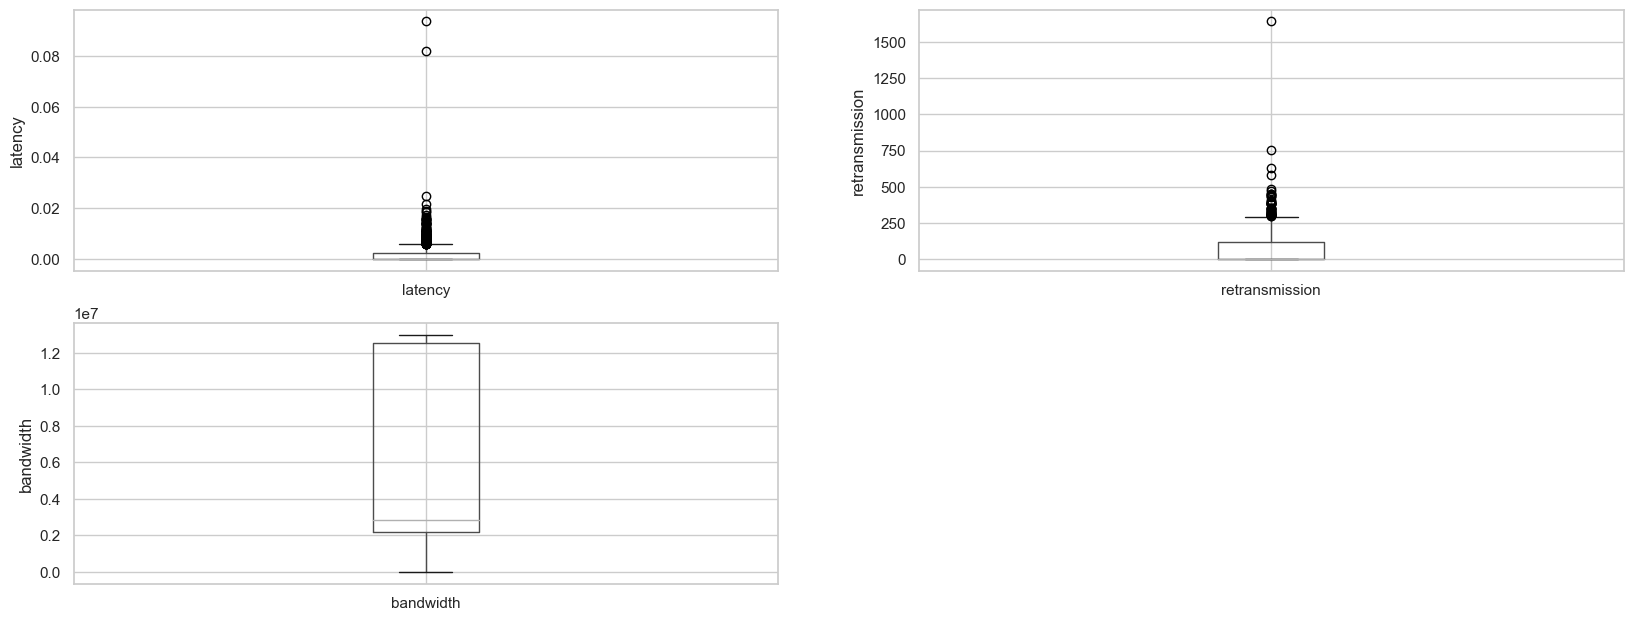

In [10]:
print(features)

plt.figure(figsize=(20,40))

i=1
for f in features:
    plt.subplot(10, 2, i)
    fig = df.boxplot(column=f)
    fig.set_title('')
    fig.set_ylabel(f)
    i += 1

### Rimozione outlier

['latency', 'retransmission', 'bandwidth']
1    601
0    598
Name: label, dtype: int64


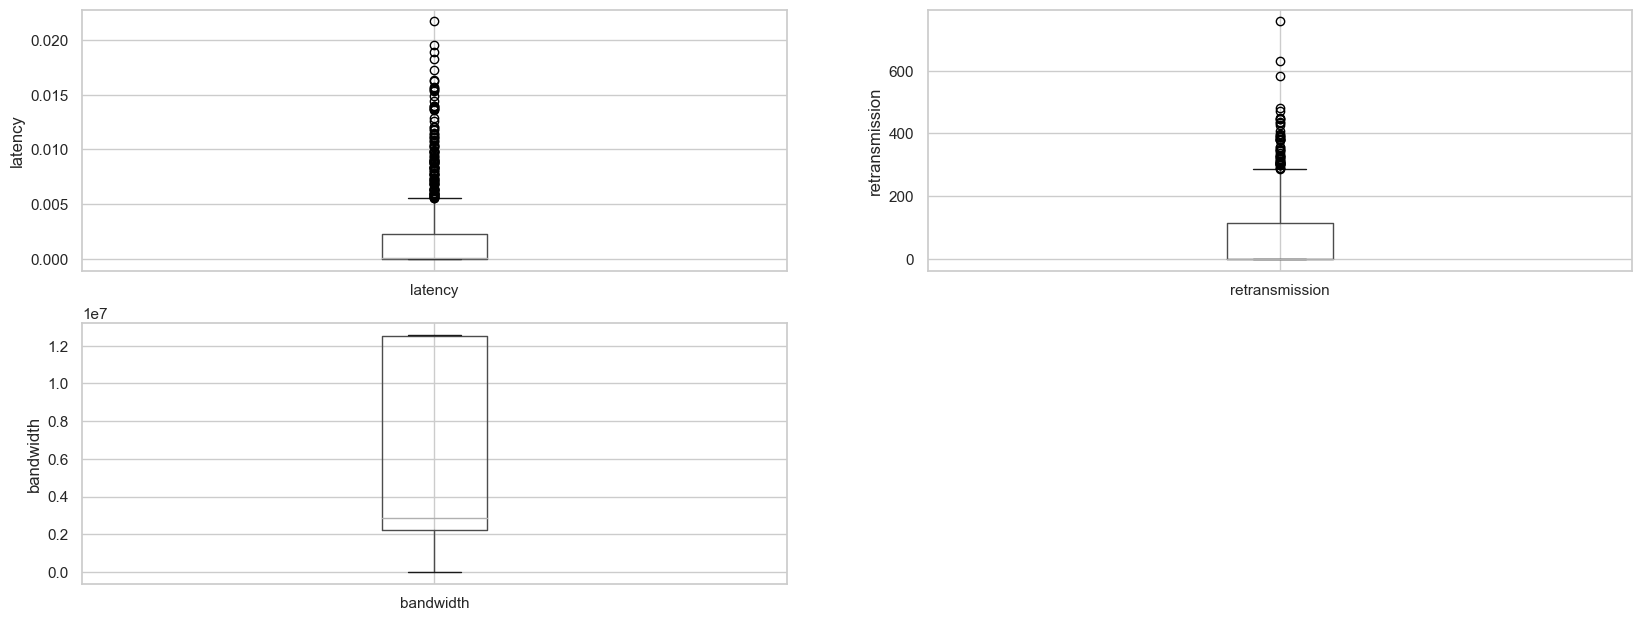

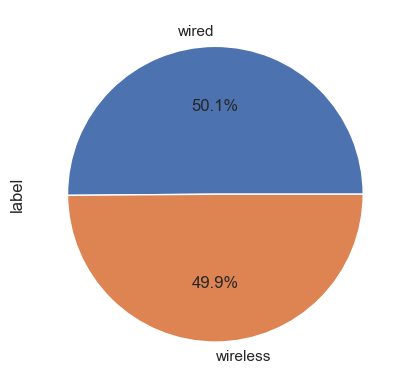

In [11]:
# Specify the columns containing the data with outliers
column_names = ['latency', 'retransmission']

# Calculate the interquartile range (IQR) for each column
Q1 = df[column_names].quantile(0.25)
Q3 = df[column_names].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers for each column
lower_bound = Q1 - 10 * IQR
upper_bound = Q3 + 10 * IQR

# Filter out rows that have values outside the bounds for either column
filtered_data = df[
    (df[column_names[0]] >= lower_bound[column_names[0]]) &
    (df[column_names[0]] <= upper_bound[column_names[0]]) &
    (df[column_names[1]] >= lower_bound[column_names[1]]) &
    (df[column_names[1]] <= upper_bound[column_names[1]])
]

df = filtered_data

# boxplot
features = list(df.columns)
features.remove('label')
print(features)

plt.figure(figsize=(20,40))

i=1
for f in features:
    plt.subplot(10, 2, i)
    fig = df.boxplot(column=f)
    fig.set_title('')
    fig.set_ylabel(f)
    i += 1

# Class distribution
print(df["label"].value_counts())
plt.figure()
figure = (df['label'].value_counts()*100.0 /len(df))\
		.plot.pie(autopct='%.1f%%', labels = ['wired', 'wireless'])
plt.show()

### Correlazione

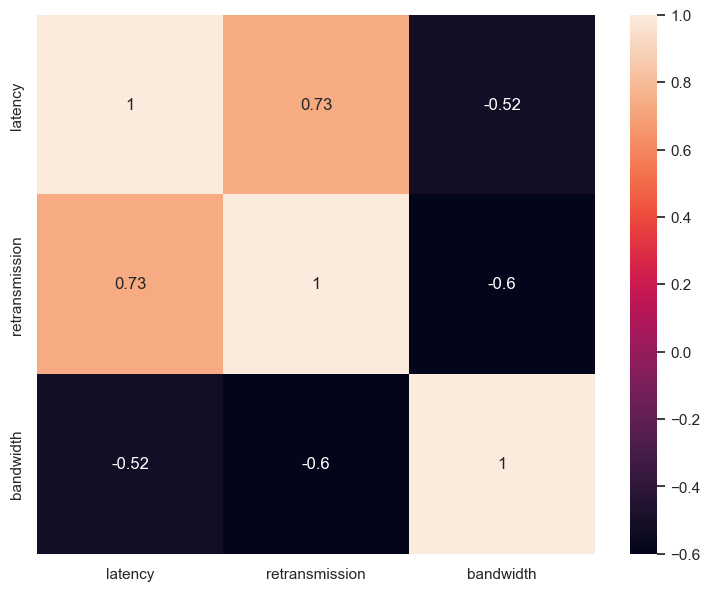

In [12]:
features_data = df[features]
plt.figure(figsize = (9,7))
sea.heatmap(features_data.corr(), annot = True)
plt.show()

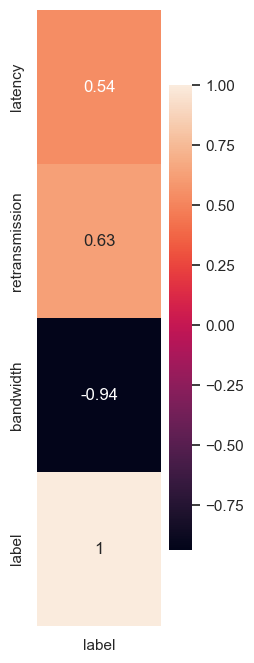

In [13]:
plt.figure(figsize=(2,8))
corr_matrix = df.corr()
sea.heatmap(corr_matrix[['label']], annot=True)
plt.show()

## Data splitting & Normalization

In [14]:
# Shuffle the dataset
df = df.sample(frac=1)
# Preview the dataset
print(df.head()) # first 5 elements

       latency  retransmission  bandwidth  label
1096  0.015468             193    2241656      1
593   0.000014               0   12524782      0
414   0.000013               0   12524784      0
115   0.000015               0   12524660      0
224   0.000017               0   12524790      0


In [15]:
# Split data
X = df.drop(['label'], axis=1)
t = df['label']

In [16]:
# Split X and t into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 0.3, random_state = 0)

In [17]:
# Check the shape of X_train and X_test
print(X_train.shape)
print(X_test.shape)

(839, 3)
(360, 3)


In [18]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Export the scaler
from joblib import dump
dump(scaler, 'scaler.pkl')

# Check if data is normalized
print(X_train.mean(axis=0))
print(X_train.std(axis=0))

[2.11723104e-17 8.68064725e-17 4.23446207e-17]
[1. 1. 1.]


## Training

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, make_scorer

In [20]:
# Initialize the softmax regression model
logistic_reg = LogisticRegression(solver='lbfgs', C=1, max_iter=1000)
grid = {"C": np.logspace(-5, 10, 30)}

In [21]:
# Perform grid search cross-validation with f1 as the scoring metric
f1 = make_scorer(f1_score)
logistic_reg_cv = GridSearchCV(logistic_reg, grid, cv=5, scoring=f1)
logistic_reg_cv.fit(X_train, t_train)

GridSearchCV(cv=5, estimator=LogisticRegression(C=1, max_iter=1000),
             param_grid={'C': array([1.00000000e-05, 3.29034456e-05, 1.08263673e-04, 3.56224789e-04,
       1.17210230e-03, 3.85662042e-03, 1.26896100e-02, 4.17531894e-02,
       1.37382380e-01, 4.52035366e-01, 1.48735211e+00, 4.89390092e+00,
       1.61026203e+01, 5.29831691e+01, 1.74332882e+02, 5.73615251e+02,
       1.88739182e+03, 6.21016942e+03, 2.04335972e+04, 6.72335754e+04,
       2.21221629e+05, 7.27895384e+05, 2.39502662e+06, 7.88046282e+06,
       2.59294380e+07, 8.53167852e+07, 2.80721620e+08, 9.23670857e+08,
       3.03919538e+09, 1.00000000e+10])},
             scoring=make_scorer(f1_score))

In [22]:
# Print the best parameters and accuracy from the grid search
print("Tuned hyperparameters (best parameters): ", logistic_reg_cv.best_params_)
print("F1: ", logistic_reg_cv.best_score_)

Tuned hyperparameters (best parameters):  {'C': 0.0011721022975334804}
F1:  0.9793866875025546


In [23]:
Y_hat_test = logistic_reg_cv.predict(X_test)
print("Accuracy score on the test set: ", accuracy_score(t_test, Y_hat_test))
print("F1 score on the test set: ", f1_score(t_test, Y_hat_test))

Accuracy score on the test set:  0.9861111111111112
F1 score on the test set:  0.9859943977591036


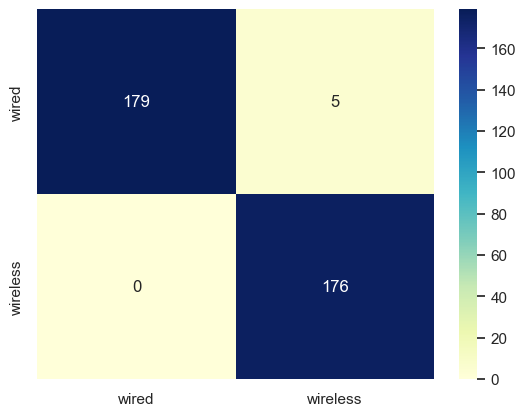

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(t_test, Y_hat_test, labels=[0,1])
cm_matrix = pd.DataFrame(data=cm, columns=['wired', 'wireless'],
                                  index=['wired', 'wireless'])

sea.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### SVM

In [25]:
# import SVC classifier
from sklearn.svm import SVC

In [26]:
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [27]:
# instantiate classifier with default hyperparameters
svc=SVC()

In [28]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [29]:
# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2] ,'gamma':[0.01,0.02]}
              ]

grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'f1_weighted',
                           cv = 5,
                           verbose=10)

In [30]:
grid_search.fit(X_train, t_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5; 1/28] START C=1, kernel=linear.........................................
[CV 1/5; 1/28] END ..........C=1, kernel=linear;, score=0.982 total time=   0.0s
[CV 2/5; 1/28] START C=1, kernel=linear.........................................
[CV 2/5; 1/28] END ..........C=1, kernel=linear;, score=0.970 total time=   0.0s
[CV 3/5; 1/28] START C=1, kernel=linear.........................................
[CV 3/5; 1/28] END ..........C=1, kernel=linear;, score=0.976 total time=   0.0s
[CV 4/5; 1/28] START C=1, kernel=linear.........................................
[CV 4/5; 1/28] END ..........C=1, kernel=linear;, score=0.958 total time=   0.0s
[CV 5/5; 1/28] START C=1, kernel=linear.........................................
[CV 5/5; 1/28] END ..........C=1, kernel=linear;, score=0.976 total time=   0.0s
[CV 1/5; 2/28] START C=10, kernel=linear........................................
[CV 1/5; 2/28] END .........C=10, kernel=linear

[CV 4/5; 11/28] END C=10, gamma=0.3, kernel=rbf;, score=0.982 total time=   0.0s
[CV 5/5; 11/28] START C=10, gamma=0.3, kernel=rbf...............................
[CV 5/5; 11/28] END C=10, gamma=0.3, kernel=rbf;, score=0.988 total time=   0.0s
[CV 1/5; 12/28] START C=10, gamma=0.4, kernel=rbf...............................
[CV 1/5; 12/28] END C=10, gamma=0.4, kernel=rbf;, score=0.994 total time=   0.0s
[CV 2/5; 12/28] START C=10, gamma=0.4, kernel=rbf...............................
[CV 2/5; 12/28] END C=10, gamma=0.4, kernel=rbf;, score=0.970 total time=   0.0s
[CV 3/5; 12/28] START C=10, gamma=0.4, kernel=rbf...............................
[CV 3/5; 12/28] END C=10, gamma=0.4, kernel=rbf;, score=0.988 total time=   0.0s
[CV 4/5; 12/28] START C=10, gamma=0.4, kernel=rbf...............................
[CV 4/5; 12/28] END C=10, gamma=0.4, kernel=rbf;, score=0.976 total time=   0.0s
[CV 5/5; 12/28] START C=10, gamma=0.4, kernel=rbf...............................
[CV 5/5; 12/28] END C=10, ga

[CV 4/5; 22/28] END C=1, degree=2, gamma=0.02, kernel=poly;, score=0.436 total time=   0.0s
[CV 5/5; 22/28] START C=1, degree=2, gamma=0.02, kernel=poly....................
[CV 5/5; 22/28] END C=1, degree=2, gamma=0.02, kernel=poly;, score=0.433 total time=   0.0s
[CV 1/5; 23/28] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 1/5; 23/28] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.468 total time=   0.0s
[CV 2/5; 23/28] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 2/5; 23/28] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.447 total time=   0.0s
[CV 3/5; 23/28] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 3/5; 23/28] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.479 total time=   0.0s
[CV 4/5; 23/28] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 4/5; 23/28] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.454 total time=   0.0s
[CV 5/5; 23/28] START C=10, degree=2, g

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4], 'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2],
                          'gamma': [0.01, 0.02], 'kernel': ['poly']}],
             scoring='f1_weighted', verbose=10)

In [31]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

estimator = grid_search.best_estimator_

from joblib import dump
dump(estimator, "bestModelSVM.joblib")

# calculate GridSearch CV score on test set
t_pred = estimator.predict(X_test)

print('Model classification report with GridSearch CV: \n', classification_report(t_test, t_pred))

GridSearch CV best score : 0.9893


Parameters that give the best results : 

 {'C': 100, 'gamma': 0.4, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=100, gamma=0.4)
Model classification report with GridSearch CV: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       184
           1       0.98      0.99      0.99       176

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



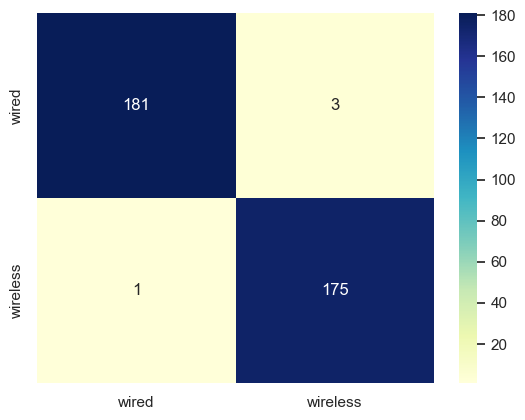

In [32]:
cm = confusion_matrix(t_test, t_pred, labels=[0,1])
cm_matrix = pd.DataFrame(data=cm, columns=['wired', 'wireless'],
                                  index=['wired', 'wireless'])

sea.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

## Impatto delle singole features

In [33]:
X_train_latency = np.delete(X_train, [1,2], axis=1)
X_test_latency = np.delete(X_test, [1,2], axis=1)
X_train_retransmission = np.delete(X_train, [0,2], axis=1)
X_test_retransmission = np.delete(X_test, [0,2], axis=1)
X_train_bandwidth = np.delete(X_train, [0,1], axis=1)
X_test_bandwidth = np.delete(X_test, [0,1], axis=1)

X_train_lat_ret = np.delete(X_train, [2], axis=1)
X_test_lat_ret = np.delete(X_test, [2], axis=1)

X_train_lat_ban = np.delete(X_train, [1], axis=1)
X_test_lat_ban = np.delete(X_test, [1], axis=1)

X_train_ret_ban = np.delete(X_train, [0], axis=1)
X_test_ret_ban = np.delete(X_test, [0], axis=1)

### Latenza

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5; 1/28] START C=1, kernel=linear.........................................
[CV 1/5; 1/28] END ..........C=1, kernel=linear;, score=0.940 total time=   0.0s
[CV 2/5; 1/28] START C=1, kernel=linear.........................................
[CV 2/5; 1/28] END ..........C=1, kernel=linear;, score=0.928 total time=   0.0s
[CV 3/5; 1/28] START C=1, kernel=linear.........................................
[CV 3/5; 1/28] END ..........C=1, kernel=linear;, score=0.904 total time=   0.0s
[CV 4/5; 1/28] START C=1, kernel=linear.........................................
[CV 4/5; 1/28] END ..........C=1, kernel=linear;, score=0.898 total time=   0.0s
[CV 5/5; 1/28] START C=1, kernel=linear.........................................
[CV 5/5; 1/28] END ..........C=1, kernel=linear;, score=0.897 total time=   0.0s
[CV 1/5; 2/28] START C=10, kernel=linear........................................
[CV 1/5; 2/28] END .........C=10, kernel=linear

[CV 5/5; 11/28] END C=10, gamma=0.3, kernel=rbf;, score=0.928 total time=   0.0s
[CV 1/5; 12/28] START C=10, gamma=0.4, kernel=rbf...............................
[CV 1/5; 12/28] END C=10, gamma=0.4, kernel=rbf;, score=0.952 total time=   0.0s
[CV 2/5; 12/28] START C=10, gamma=0.4, kernel=rbf...............................
[CV 2/5; 12/28] END C=10, gamma=0.4, kernel=rbf;, score=0.928 total time=   0.0s
[CV 3/5; 12/28] START C=10, gamma=0.4, kernel=rbf...............................
[CV 3/5; 12/28] END C=10, gamma=0.4, kernel=rbf;, score=0.940 total time=   0.0s
[CV 4/5; 12/28] START C=10, gamma=0.4, kernel=rbf...............................
[CV 4/5; 12/28] END C=10, gamma=0.4, kernel=rbf;, score=0.934 total time=   0.0s
[CV 5/5; 12/28] START C=10, gamma=0.4, kernel=rbf...............................
[CV 5/5; 12/28] END C=10, gamma=0.4, kernel=rbf;, score=0.928 total time=   0.0s
[CV 1/5; 13/28] START C=100, gamma=0.1, kernel=rbf..............................
[CV 1/5; 13/28] END C=100, g

[CV 2/5; 23/28] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.413 total time=   0.0s
[CV 3/5; 23/28] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 3/5; 23/28] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.436 total time=   0.0s
[CV 4/5; 23/28] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 4/5; 23/28] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.410 total time=   0.0s
[CV 5/5; 23/28] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 5/5; 23/28] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.422 total time=   0.0s
[CV 1/5; 24/28] START C=10, degree=2, gamma=0.02, kernel=poly...................
[CV 1/5; 24/28] END C=10, degree=2, gamma=0.02, kernel=poly;, score=0.468 total time=   0.0s
[CV 2/5; 24/28] START C=10, degree=2, gamma=0.02, kernel=poly...................
[CV 2/5; 24/28] END C=10, degree=2, gamma=0.02, kernel=poly;, score=0.447 total time=   0.0s
[CV 3/5; 24/28] START C=10, degree=2,

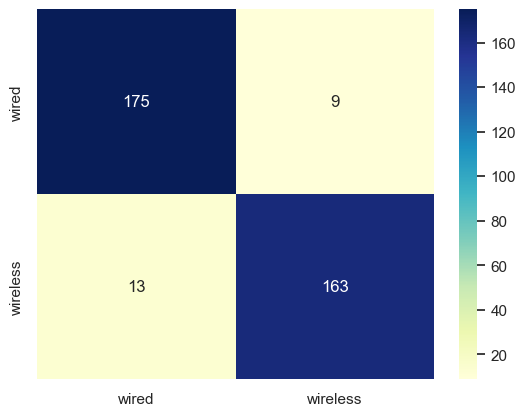

In [34]:
svc=SVC()
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2] ,'gamma':[0.01,0.02]}
              ]

grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'f1_weighted',
                           cv = 5,
                           verbose=10)


grid_search.fit(X_train_latency, t_train)
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

estimator = grid_search.best_estimator_

# calculate GridSearch CV score on test set
t_pred = estimator.predict(X_test_latency)

print('Model classification report with GridSearch CV: \n', classification_report(t_test, t_pred))
cm = confusion_matrix(t_test, t_pred, labels=[0,1])
cm_matrix = pd.DataFrame(data=cm, columns=['wired', 'wireless'],
                                  index=['wired', 'wireless'])

sea.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### Retransmission

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5; 1/28] START C=1, kernel=linear.........................................
[CV 1/5; 1/28] END ..........C=1, kernel=linear;, score=0.892 total time=   0.0s
[CV 2/5; 1/28] START C=1, kernel=linear.........................................
[CV 2/5; 1/28] END ..........C=1, kernel=linear;, score=0.904 total time=   0.0s
[CV 3/5; 1/28] START C=1, kernel=linear.........................................
[CV 3/5; 1/28] END ..........C=1, kernel=linear;, score=0.848 total time=   0.0s
[CV 4/5; 1/28] START C=1, kernel=linear.........................................
[CV 4/5; 1/28] END ..........C=1, kernel=linear;, score=0.880 total time=   0.0s
[CV 5/5; 1/28] START C=1, kernel=linear.........................................
[CV 5/5; 1/28] END ..........C=1, kernel=linear;, score=0.891 total time=   0.0s
[CV 1/5; 2/28] START C=10, kernel=linear........................................
[CV 1/5; 2/28] END .........C=10, kernel=linear

[CV 4/5; 11/28] END C=10, gamma=0.3, kernel=rbf;, score=0.892 total time=   0.0s
[CV 5/5; 11/28] START C=10, gamma=0.3, kernel=rbf...............................
[CV 5/5; 11/28] END C=10, gamma=0.3, kernel=rbf;, score=0.891 total time=   0.0s
[CV 1/5; 12/28] START C=10, gamma=0.4, kernel=rbf...............................
[CV 1/5; 12/28] END C=10, gamma=0.4, kernel=rbf;, score=0.886 total time=   0.0s
[CV 2/5; 12/28] START C=10, gamma=0.4, kernel=rbf...............................
[CV 2/5; 12/28] END C=10, gamma=0.4, kernel=rbf;, score=0.916 total time=   0.0s
[CV 3/5; 12/28] START C=10, gamma=0.4, kernel=rbf...............................
[CV 3/5; 12/28] END C=10, gamma=0.4, kernel=rbf;, score=0.861 total time=   0.0s
[CV 4/5; 12/28] START C=10, gamma=0.4, kernel=rbf...............................
[CV 4/5; 12/28] END C=10, gamma=0.4, kernel=rbf;, score=0.892 total time=   0.0s
[CV 5/5; 12/28] START C=10, gamma=0.4, kernel=rbf...............................
[CV 5/5; 12/28] END C=10, ga

[CV 5/5; 21/28] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.343 total time=   0.0s
[CV 1/5; 22/28] START C=1, degree=2, gamma=0.02, kernel=poly....................
[CV 1/5; 22/28] END C=1, degree=2, gamma=0.02, kernel=poly;, score=0.340 total time=   0.0s
[CV 2/5; 22/28] START C=1, degree=2, gamma=0.02, kernel=poly....................
[CV 2/5; 22/28] END C=1, degree=2, gamma=0.02, kernel=poly;, score=0.575 total time=   0.0s
[CV 3/5; 22/28] START C=1, degree=2, gamma=0.02, kernel=poly....................
[CV 3/5; 22/28] END C=1, degree=2, gamma=0.02, kernel=poly;, score=0.566 total time=   0.0s
[CV 4/5; 22/28] START C=1, degree=2, gamma=0.02, kernel=poly....................
[CV 4/5; 22/28] END C=1, degree=2, gamma=0.02, kernel=poly;, score=0.610 total time=   0.0s
[CV 5/5; 22/28] START C=1, degree=2, gamma=0.02, kernel=poly....................
[CV 5/5; 22/28] END C=1, degree=2, gamma=0.02, kernel=poly;, score=0.600 total time=   0.0s
[CV 1/5; 23/28] START C=10, degree=2, gamma

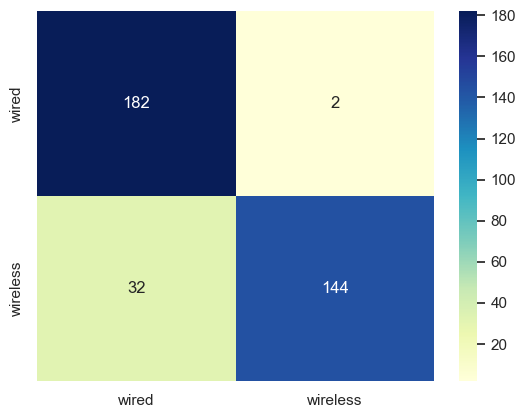

In [35]:
svc=SVC()
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2] ,'gamma':[0.01,0.02]}
              ]

grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'f1_weighted',
                           cv = 5,
                           verbose=10)


grid_search.fit(X_train_retransmission, t_train)
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

estimator = grid_search.best_estimator_

# calculate GridSearch CV score on test set
t_pred = estimator.predict(X_test_retransmission)

print('Model classification report with GridSearch CV: \n', classification_report(t_test, t_pred))
cm = confusion_matrix(t_test, t_pred, labels=[0,1])
cm_matrix = pd.DataFrame(data=cm, columns=['wired', 'wireless'],
                                  index=['wired', 'wireless'])

sea.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### Bandwidth

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5; 1/28] START C=1, kernel=linear.........................................
[CV 1/5; 1/28] END ..........C=1, kernel=linear;, score=0.982 total time=   0.0s
[CV 2/5; 1/28] START C=1, kernel=linear.........................................
[CV 2/5; 1/28] END ..........C=1, kernel=linear;, score=0.970 total time=   0.0s
[CV 3/5; 1/28] START C=1, kernel=linear.........................................
[CV 3/5; 1/28] END ..........C=1, kernel=linear;, score=0.976 total time=   0.0s
[CV 4/5; 1/28] START C=1, kernel=linear.........................................
[CV 4/5; 1/28] END ..........C=1, kernel=linear;, score=0.964 total time=   0.0s
[CV 5/5; 1/28] START C=1, kernel=linear.........................................
[CV 5/5; 1/28] END ..........C=1, kernel=linear;, score=0.976 total time=   0.0s
[CV 1/5; 2/28] START C=10, kernel=linear........................................
[CV 1/5; 2/28] END .........C=10, kernel=linear

[CV 5/5; 15/28] END C=100, gamma=0.3, kernel=rbf;, score=0.994 total time=   0.0s
[CV 1/5; 16/28] START C=100, gamma=0.4, kernel=rbf..............................
[CV 1/5; 16/28] END C=100, gamma=0.4, kernel=rbf;, score=0.994 total time=   0.0s
[CV 2/5; 16/28] START C=100, gamma=0.4, kernel=rbf..............................
[CV 2/5; 16/28] END C=100, gamma=0.4, kernel=rbf;, score=0.976 total time=   0.0s
[CV 3/5; 16/28] START C=100, gamma=0.4, kernel=rbf..............................
[CV 3/5; 16/28] END C=100, gamma=0.4, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5; 16/28] START C=100, gamma=0.4, kernel=rbf..............................
[CV 4/5; 16/28] END C=100, gamma=0.4, kernel=rbf;, score=0.982 total time=   0.0s
[CV 5/5; 16/28] START C=100, gamma=0.4, kernel=rbf..............................
[CV 5/5; 16/28] END C=100, gamma=0.4, kernel=rbf;, score=0.994 total time=   0.0s
[CV 1/5; 17/28] START C=1000, gamma=0.1, kernel=rbf.............................
[CV 1/5; 17/28] END C=

[CV 1/5; 27/28] END C=1000, degree=2, gamma=0.01, kernel=poly;, score=0.893 total time=   0.0s
[CV 2/5; 27/28] START C=1000, degree=2, gamma=0.01, kernel=poly.................
[CV 2/5; 27/28] END C=1000, degree=2, gamma=0.01, kernel=poly;, score=0.827 total time=   0.0s
[CV 3/5; 27/28] START C=1000, degree=2, gamma=0.01, kernel=poly.................
[CV 3/5; 27/28] END C=1000, degree=2, gamma=0.01, kernel=poly;, score=0.893 total time=   0.0s
[CV 4/5; 27/28] START C=1000, degree=2, gamma=0.01, kernel=poly.................
[CV 4/5; 27/28] END C=1000, degree=2, gamma=0.01, kernel=poly;, score=0.887 total time=   0.0s
[CV 5/5; 27/28] START C=1000, degree=2, gamma=0.01, kernel=poly.................
[CV 5/5; 27/28] END C=1000, degree=2, gamma=0.01, kernel=poly;, score=0.874 total time=   0.0s
[CV 1/5; 28/28] START C=1000, degree=2, gamma=0.02, kernel=poly.................
[CV 1/5; 28/28] END C=1000, degree=2, gamma=0.02, kernel=poly;, score=0.899 total time=   0.0s
[CV 2/5; 28/28] START C=1

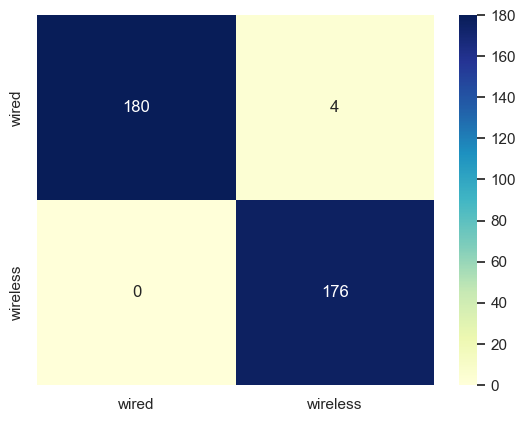

In [36]:
svc=SVC()
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2] ,'gamma':[0.01,0.02]}
              ]

grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'f1_weighted',
                           cv = 5,
                           verbose=10)


grid_search.fit(X_train_bandwidth, t_train)
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

estimator = grid_search.best_estimator_

# calculate GridSearch CV score on test set
t_pred = estimator.predict(X_test_bandwidth)

print('Model classification report with GridSearch CV: \n', classification_report(t_test, t_pred))
cm = confusion_matrix(t_test, t_pred, labels=[0,1])
cm_matrix = pd.DataFrame(data=cm, columns=['wired', 'wireless'],
                                  index=['wired', 'wireless'])

sea.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### Latency & Retransmission

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5; 1/28] START C=1, kernel=linear.........................................
[CV 1/5; 1/28] END ..........C=1, kernel=linear;, score=0.904 total time=   0.0s
[CV 2/5; 1/28] START C=1, kernel=linear.........................................
[CV 2/5; 1/28] END ..........C=1, kernel=linear;, score=0.916 total time=   0.0s
[CV 3/5; 1/28] START C=1, kernel=linear.........................................
[CV 3/5; 1/28] END ..........C=1, kernel=linear;, score=0.861 total time=   0.0s
[CV 4/5; 1/28] START C=1, kernel=linear.........................................
[CV 4/5; 1/28] END ..........C=1, kernel=linear;, score=0.910 total time=   0.0s
[CV 5/5; 1/28] START C=1, kernel=linear.........................................
[CV 5/5; 1/28] END ..........C=1, kernel=linear;, score=0.903 total time=   0.0s
[CV 1/5; 2/28] START C=10, kernel=linear........................................
[CV 1/5; 2/28] END .........C=10, kernel=linear

[CV 4/5; 13/28] END C=100, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 5/5; 13/28] START C=100, gamma=0.1, kernel=rbf..............................
[CV 5/5; 13/28] END C=100, gamma=0.1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 1/5; 14/28] START C=100, gamma=0.2, kernel=rbf..............................
[CV 1/5; 14/28] END C=100, gamma=0.2, kernel=rbf;, score=0.958 total time=   0.0s
[CV 2/5; 14/28] START C=100, gamma=0.2, kernel=rbf..............................
[CV 2/5; 14/28] END C=100, gamma=0.2, kernel=rbf;, score=0.952 total time=   0.0s
[CV 3/5; 14/28] START C=100, gamma=0.2, kernel=rbf..............................
[CV 3/5; 14/28] END C=100, gamma=0.2, kernel=rbf;, score=0.946 total time=   0.0s
[CV 4/5; 14/28] START C=100, gamma=0.2, kernel=rbf..............................
[CV 4/5; 14/28] END C=100, gamma=0.2, kernel=rbf;, score=0.940 total time=   0.0s
[CV 5/5; 14/28] START C=100, gamma=0.2, kernel=rbf..............................
[CV 5/5; 14/28] END C=

[CV 5/5; 23/28] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.487 total time=   0.0s
[CV 1/5; 24/28] START C=10, degree=2, gamma=0.02, kernel=poly...................
[CV 1/5; 24/28] END C=10, degree=2, gamma=0.02, kernel=poly;, score=0.529 total time=   0.0s
[CV 2/5; 24/28] START C=10, degree=2, gamma=0.02, kernel=poly...................
[CV 2/5; 24/28] END C=10, degree=2, gamma=0.02, kernel=poly;, score=0.499 total time=   0.0s
[CV 3/5; 24/28] START C=10, degree=2, gamma=0.02, kernel=poly...................
[CV 3/5; 24/28] END C=10, degree=2, gamma=0.02, kernel=poly;, score=0.557 total time=   0.0s
[CV 4/5; 24/28] START C=10, degree=2, gamma=0.02, kernel=poly...................
[CV 4/5; 24/28] END C=10, degree=2, gamma=0.02, kernel=poly;, score=0.515 total time=   0.0s
[CV 5/5; 24/28] START C=10, degree=2, gamma=0.02, kernel=poly...................
[CV 5/5; 24/28] END C=10, degree=2, gamma=0.02, kernel=poly;, score=0.536 total time=   0.0s
[CV 1/5; 25/28] START C=100, degree=2

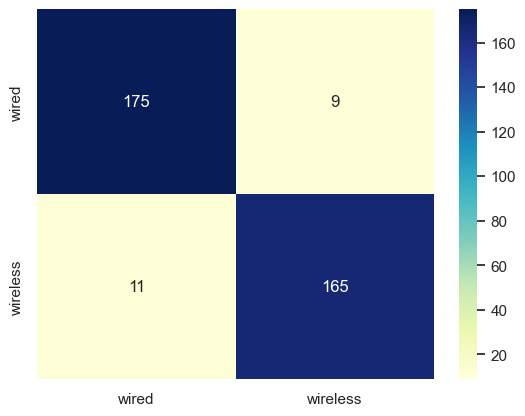

In [37]:
svc=SVC()
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2] ,'gamma':[0.01,0.02]}
              ]

grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'f1_weighted',
                           cv = 5,
                           verbose=10)


grid_search.fit(X_train_lat_ret, t_train)
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

estimator = grid_search.best_estimator_

# calculate GridSearch CV score on test set
t_pred = estimator.predict(X_test_lat_ret)

print('Model classification report with GridSearch CV: \n', classification_report(t_test, t_pred))
cm = confusion_matrix(t_test, t_pred, labels=[0,1])
cm_matrix = pd.DataFrame(data=cm, columns=['wired', 'wireless'],
                                  index=['wired', 'wireless'])

sea.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### Latency & Bandwidth

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5; 1/28] START C=1, kernel=linear.........................................
[CV 1/5; 1/28] END ..........C=1, kernel=linear;, score=0.982 total time=   0.0s
[CV 2/5; 1/28] START C=1, kernel=linear.........................................
[CV 2/5; 1/28] END ..........C=1, kernel=linear;, score=0.970 total time=   0.0s
[CV 3/5; 1/28] START C=1, kernel=linear.........................................
[CV 3/5; 1/28] END ..........C=1, kernel=linear;, score=0.976 total time=   0.0s
[CV 4/5; 1/28] START C=1, kernel=linear.........................................
[CV 4/5; 1/28] END ..........C=1, kernel=linear;, score=0.958 total time=   0.0s
[CV 5/5; 1/28] START C=1, kernel=linear.........................................
[CV 5/5; 1/28] END ..........C=1, kernel=linear;, score=0.976 total time=   0.0s
[CV 1/5; 2/28] START C=10, kernel=linear........................................
[CV 1/5; 2/28] END .........C=10, kernel=linear

[CV 1/5; 12/28] END C=10, gamma=0.4, kernel=rbf;, score=0.994 total time=   0.0s
[CV 2/5; 12/28] START C=10, gamma=0.4, kernel=rbf...............................
[CV 2/5; 12/28] END C=10, gamma=0.4, kernel=rbf;, score=0.970 total time=   0.0s
[CV 3/5; 12/28] START C=10, gamma=0.4, kernel=rbf...............................
[CV 3/5; 12/28] END C=10, gamma=0.4, kernel=rbf;, score=0.988 total time=   0.0s
[CV 4/5; 12/28] START C=10, gamma=0.4, kernel=rbf...............................
[CV 4/5; 12/28] END C=10, gamma=0.4, kernel=rbf;, score=0.982 total time=   0.0s
[CV 5/5; 12/28] START C=10, gamma=0.4, kernel=rbf...............................
[CV 5/5; 12/28] END C=10, gamma=0.4, kernel=rbf;, score=0.988 total time=   0.0s
[CV 1/5; 13/28] START C=100, gamma=0.1, kernel=rbf..............................
[CV 1/5; 13/28] END C=100, gamma=0.1, kernel=rbf;, score=0.994 total time=   0.0s
[CV 2/5; 13/28] START C=100, gamma=0.1, kernel=rbf..............................
[CV 2/5; 13/28] END C=100, 

[CV 1/5; 23/28] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.413 total time=   0.0s
[CV 2/5; 23/28] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 2/5; 23/28] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.401 total time=   0.0s
[CV 3/5; 23/28] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 3/5; 23/28] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.436 total time=   0.0s
[CV 4/5; 23/28] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 4/5; 23/28] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.386 total time=   0.0s
[CV 5/5; 23/28] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 5/5; 23/28] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.422 total time=   0.0s
[CV 1/5; 24/28] START C=10, degree=2, gamma=0.02, kernel=poly...................
[CV 1/5; 24/28] END C=10, degree=2, gamma=0.02, kernel=poly;, score=0.458 total time=   0.0s
[CV 2/5; 24/28] START C=10, degree=2,

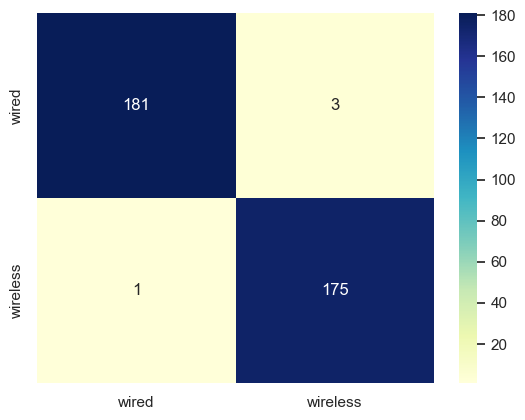

In [38]:
svc=SVC()
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2] ,'gamma':[0.01,0.02]}
              ]

grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'f1_weighted',
                           cv = 5,
                           verbose=10)


grid_search.fit(X_train_lat_ban, t_train)
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

estimator = grid_search.best_estimator_

# calculate GridSearch CV score on test set
t_pred = estimator.predict(X_test_lat_ban)

print('Model classification report with GridSearch CV: \n', classification_report(t_test, t_pred))
cm = confusion_matrix(t_test, t_pred, labels=[0,1])
cm_matrix = pd.DataFrame(data=cm, columns=['wired', 'wireless'],
                                  index=['wired', 'wireless'])

sea.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### Retransmission & Bandwidth

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5; 1/28] START C=1, kernel=linear.........................................
[CV 1/5; 1/28] END ..........C=1, kernel=linear;, score=0.982 total time=   0.0s
[CV 2/5; 1/28] START C=1, kernel=linear.........................................
[CV 2/5; 1/28] END ..........C=1, kernel=linear;, score=0.970 total time=   0.0s
[CV 3/5; 1/28] START C=1, kernel=linear.........................................
[CV 3/5; 1/28] END ..........C=1, kernel=linear;, score=0.976 total time=   0.0s
[CV 4/5; 1/28] START C=1, kernel=linear.........................................
[CV 4/5; 1/28] END ..........C=1, kernel=linear;, score=0.964 total time=   0.0s
[CV 5/5; 1/28] START C=1, kernel=linear.........................................
[CV 5/5; 1/28] END ..........C=1, kernel=linear;, score=0.976 total time=   0.0s
[CV 1/5; 2/28] START C=10, kernel=linear........................................
[CV 1/5; 2/28] END .........C=10, kernel=linear

[CV 3/5; 13/28] END C=100, gamma=0.1, kernel=rbf;, score=0.982 total time=   0.0s
[CV 4/5; 13/28] START C=100, gamma=0.1, kernel=rbf..............................
[CV 4/5; 13/28] END C=100, gamma=0.1, kernel=rbf;, score=0.988 total time=   0.0s
[CV 5/5; 13/28] START C=100, gamma=0.1, kernel=rbf..............................
[CV 5/5; 13/28] END C=100, gamma=0.1, kernel=rbf;, score=0.988 total time=   0.0s
[CV 1/5; 14/28] START C=100, gamma=0.2, kernel=rbf..............................
[CV 1/5; 14/28] END C=100, gamma=0.2, kernel=rbf;, score=0.994 total time=   0.0s
[CV 2/5; 14/28] START C=100, gamma=0.2, kernel=rbf..............................
[CV 2/5; 14/28] END C=100, gamma=0.2, kernel=rbf;, score=0.976 total time=   0.0s
[CV 3/5; 14/28] START C=100, gamma=0.2, kernel=rbf..............................
[CV 3/5; 14/28] END C=100, gamma=0.2, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5; 14/28] START C=100, gamma=0.2, kernel=rbf..............................
[CV 4/5; 14/28] END C=

[CV 4/5; 24/28] END C=10, degree=2, gamma=0.02, kernel=poly;, score=0.479 total time=   0.0s
[CV 5/5; 24/28] START C=10, degree=2, gamma=0.02, kernel=poly...................
[CV 5/5; 24/28] END C=10, degree=2, gamma=0.02, kernel=poly;, score=0.497 total time=   0.0s
[CV 1/5; 25/28] START C=100, degree=2, gamma=0.01, kernel=poly..................
[CV 1/5; 25/28] END C=100, degree=2, gamma=0.01, kernel=poly;, score=0.700 total time=   0.0s
[CV 2/5; 25/28] START C=100, degree=2, gamma=0.01, kernel=poly..................
[CV 2/5; 25/28] END C=100, degree=2, gamma=0.01, kernel=poly;, score=0.616 total time=   0.0s
[CV 3/5; 25/28] START C=100, degree=2, gamma=0.01, kernel=poly..................
[CV 3/5; 25/28] END C=100, degree=2, gamma=0.01, kernel=poly;, score=0.763 total time=   0.0s
[CV 4/5; 25/28] START C=100, degree=2, gamma=0.01, kernel=poly..................
[CV 4/5; 25/28] END C=100, degree=2, gamma=0.01, kernel=poly;, score=0.712 total time=   0.0s
[CV 5/5; 25/28] START C=100, degr

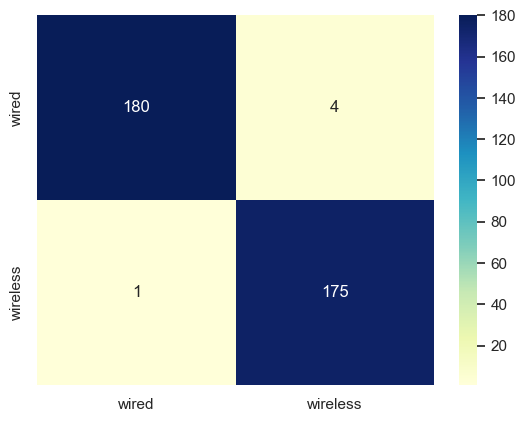

In [39]:
svc=SVC()
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2] ,'gamma':[0.01,0.02]}
              ]

grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'f1_weighted',
                           cv = 5,
                           verbose=10)


grid_search.fit(X_train_ret_ban, t_train)
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

estimator = grid_search.best_estimator_

# calculate GridSearch CV score on test set
t_pred = estimator.predict(X_test_ret_ban)

print('Model classification report with GridSearch CV: \n', classification_report(t_test, t_pred))
cm = confusion_matrix(t_test, t_pred, labels=[0,1])
cm_matrix = pd.DataFrame(data=cm, columns=['wired', 'wireless'],
                                  index=['wired', 'wireless'])

sea.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()